In [19]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
from heatflux_functions import *
from data_accessors import *
import xarray as xr

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15


plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams.update({'font.size': 14})


def replace_guards(var):
    """
	This in-place replaces the points in the guard cells with the points on the boundary
    
    """
    # Strip the edge guard cells
    var = var[1:-1]

    var[0] = 0.5*(var[0] + var[1])
    var[-1] = 0.5*(var[-1] + var[-2])
    return var

In [20]:
ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')


In [21]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]
x_point = 42
x = sh['y']

x_point_index = np.argmin(np.abs(x - x_point))


power_injection_electrons = np.array([4e8]*len(x[:]))
power_injection_ions = np.array([4e8]*len(x[:]))
power_injection_total = power_injection_electrons + power_injection_ions
power_injection_total = power_injection_total


Spitzer-Harm heat flux as calculated in hermes-3 and BOUT++ https://bout-dev.readthedocs.io/en/stable/user_docs/nonlocal.html

$$
Q_{SH,e} = - \frac{n_{e}eT_{e}3\sqrt{ \pi }}{4m_{e}}\cdot \tau_{ei,T}\kappa_{0} \cdot \frac{Z+0.24}{Z+4.2}\partial_{\parallel}T_{e}
$$

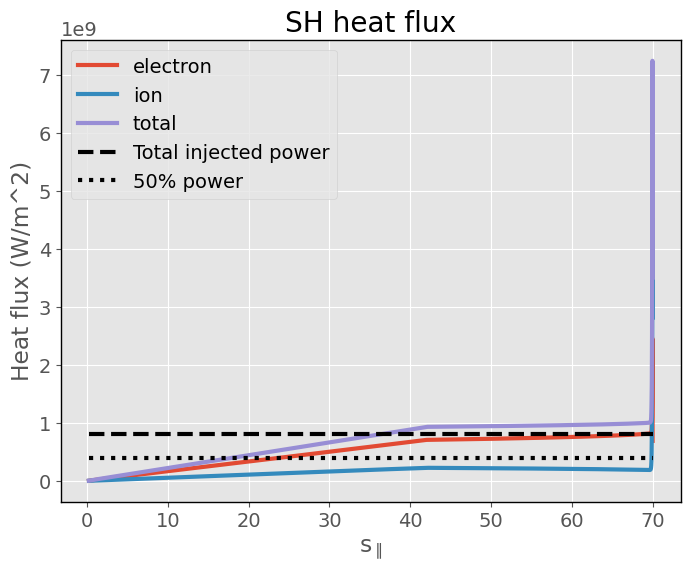

In [22]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]

x = sh['y']
q_electron = spitzer_q_electron(sh)
q_ion = spitzer_q_ion(sh)


q_total = q_electron + q_ion
electron_injection = power_injection_total/2

fig,ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(x, q_electron, label='electron', linewidth=linewidth)
ax.plot(x, q_ion, label='ion', linewidth=linewidth)
ax.plot(x, q_total, label='total', linewidth=linewidth)
ax.plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax.plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')


ax.set_title('SH heat flux')
# ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()

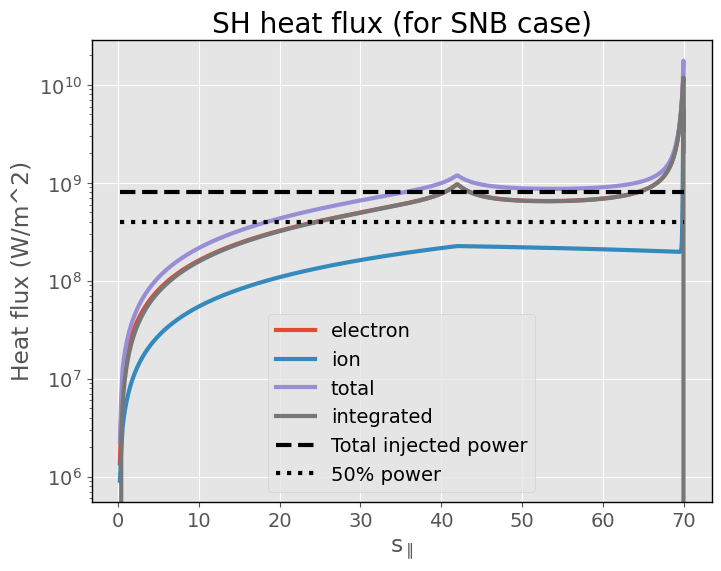

In [24]:
sh = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == 0.0)]

x = sh['y']
q_electron = spitzer_q_electron(sh)
q_ion = spitzer_q_ion(sh)

q_electron_integrated_SH = divq_integrate(sh, False)

q_electron_integrated_SNB = divq_integrate(sh, True)

q_total = q_electron + q_ion

electron_injection = power_injection_total/2

fig,ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(x, q_electron, label='electron', linewidth=linewidth)
ax.plot(x, q_ion, label='ion', linewidth=linewidth)
ax.plot(x, q_total, label='total', linewidth=linewidth)
ax.plot(x, q_electron_integrated_SH, label='integrated', linewidth=linewidth)
ax.plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax.plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')


ax.set_title('SH heat flux (for SNB case)')
ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()

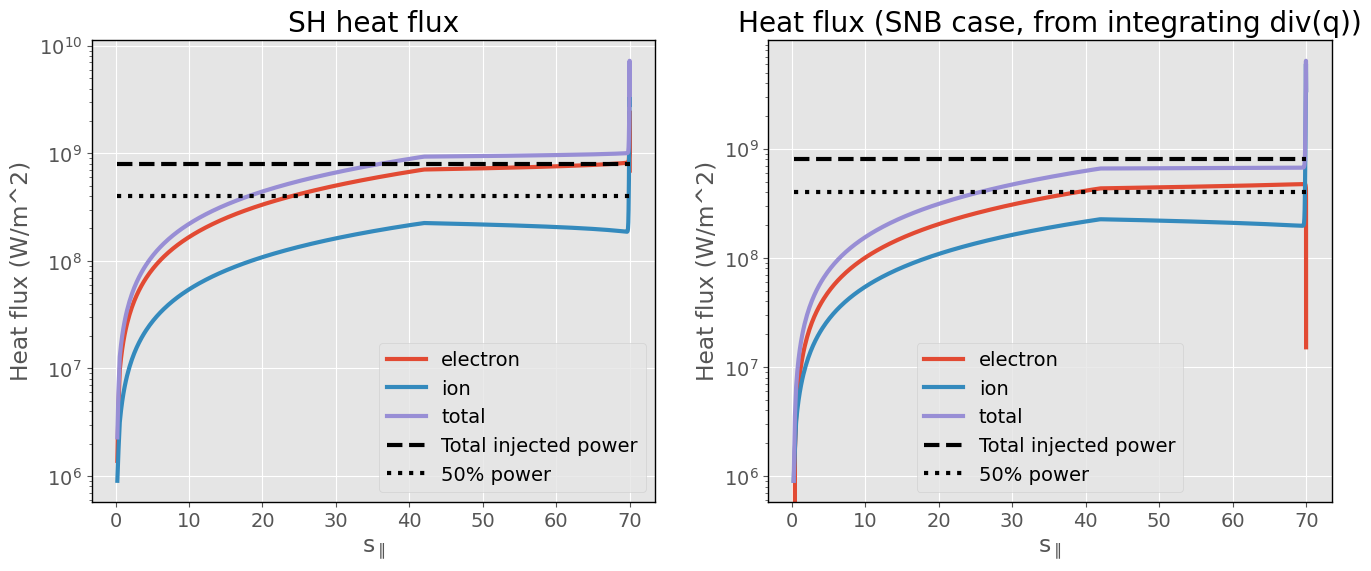

In [25]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]
x = sh['y']
q_electron = spitzer_q_electron(sh)
q_ion = spitzer_q_ion(sh)


q_total = q_electron + q_ion
electron_injection = power_injection_total/2



snb_ds = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == 0.0)]

x = snb_ds['y']

q_electron_integrated_SH = divq_integrate(snb_ds, False)

q_electron_integrated_SNB = divq_integrate(snb_ds, True)
q_ion_SNB = spitzer_q_ion(snb_ds)

total = q_electron_integrated_SNB + q_ion_SNB

fig,ax = plt.subplots(1,2, figsize=(16,6))

# ax.plot(x, q_electron_integrated_SH, label='SH', linewidth=linewidth)
ax[0].plot(x, q_electron, label='electron', linewidth=linewidth)
ax[0].plot(x, q_ion, label='ion', linewidth=linewidth)
ax[0].plot(x, q_total, label='total', linewidth=linewidth)
ax[0].plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax[0].plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')


ax[0].set_title('SH heat flux')
ax[0].set_yscale('log')
ax[0].set_ylabel('Heat flux (W/m^2)')
ax[0].set_xlabel(r's$_{\parallel}$')
ax[0].legend()

ax[1].plot(x, q_electron_integrated_SNB, label='electron', linewidth=linewidth)
ax[1].plot(x, q_ion_SNB, label='ion', linewidth=linewidth)
ax[1].plot(x, total, label='total', linewidth=linewidth)
ax[1].plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax[1].plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')
ax[1].set_title('Heat flux (SNB case, from integrating div(q))')
ax[1].set_yscale('log')
ax[1].set_ylabel('Heat flux (W/m^2)')
ax[1].set_xlabel(r's$_{\parallel}$')
ax[1].legend()

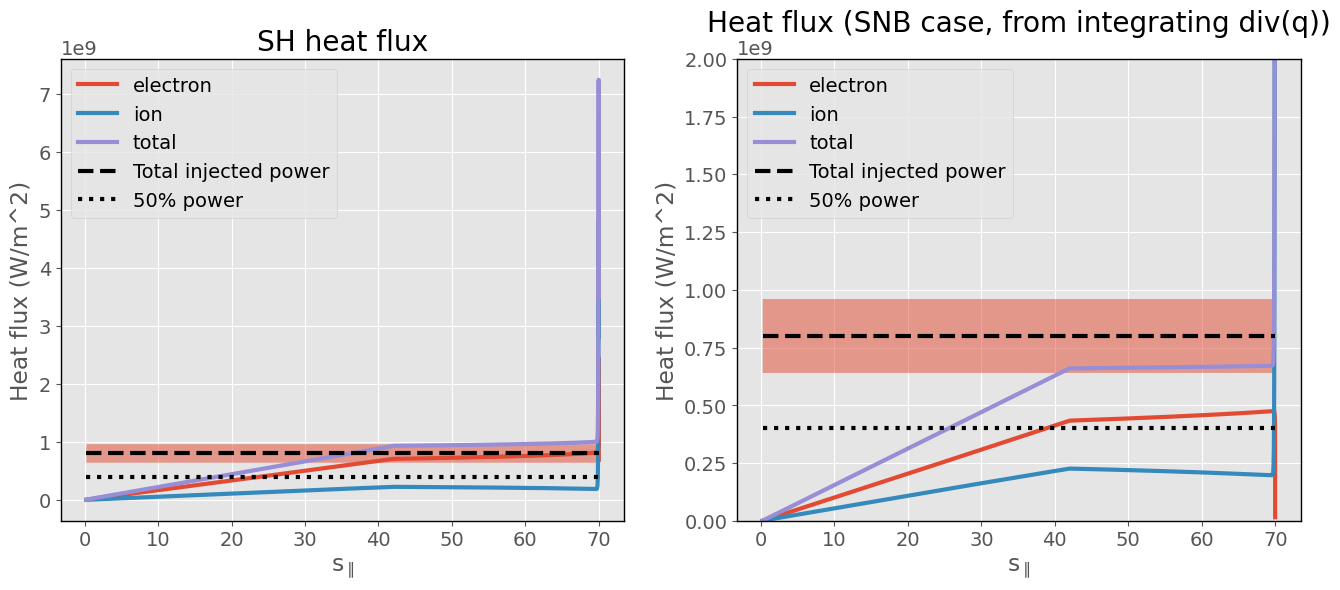

In [41]:
fig,ax = plt.subplots(1,2, figsize=(16,6))

# ax.plot(x, q_electron_integrated_SH, label='SH', linewidth=linewidth)
ax[0].plot(x, q_electron, label='electron', linewidth=linewidth)
ax[0].plot(x, q_ion, label='ion', linewidth=linewidth)
ax[0].plot(x, q_total, label='total', linewidth=linewidth)
ax[0].plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax[0].plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')
ax[0].fill_between(x[:], power_injection_total*0.8, power_injection_total*1.2, alpha=0.5)


ax[0].set_title('SH heat flux')
# ax[0].set_yscale('log')
ax[0].set_ybound(0,2e9)
ax[0].set_ylabel('Heat flux (W/m^2)')
ax[0].set_xlabel(r's$_{\parallel}$')
ax[0].legend()

ax[1].plot(x, q_electron_integrated_SNB, label='electron', linewidth=linewidth)
ax[1].plot(x, q_ion_SNB, label='ion', linewidth=linewidth)
ax[1].plot(x, total, label='total', linewidth=linewidth)
ax[1].plot(x[:], power_injection_total, label='Total injected power', linewidth=linewidth, color = 'black', linestyle='--')
ax[1].fill_between(x[:], power_injection_total*0.8, power_injection_total*1.2, alpha=0.5)

ax[1].plot(x[:], electron_injection, label='50% power', linewidth=linewidth, color = 'black', linestyle=':')
ax[1].set_title('Heat flux (SNB case, from integrating div(q))')
# ax[1].set_yscale('log')
ax[1].set_ybound(0,2e9)
ax[1].set_ylabel('Heat flux (W/m^2)')
ax[1].set_xlabel(r's$_{\parallel}$')
ax[1].legend()





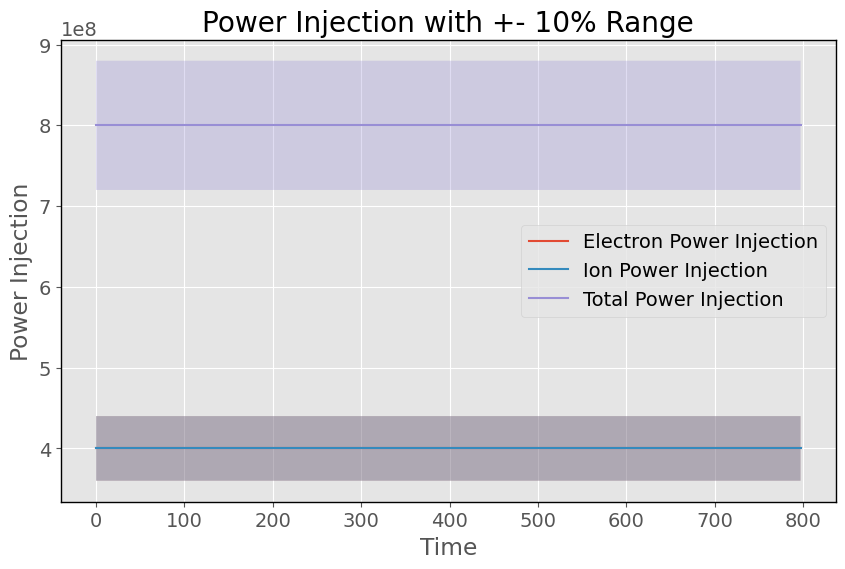

In [33]:
# Plotting power injection
plt.figure(figsize=(10, 6))
plt.plot(power_injection_electrons, label='Electron Power Injection')
plt.plot(power_injection_ions, label='Ion Power Injection')
plt.plot(power_injection_total, label='Total Power Injection')

# Plotting +- 10% range
plt.fill_between(range(len(power_injection_electrons)), power_injection_electrons*0.9, power_injection_electrons*1.1, alpha=0.3)
plt.fill_between(range(len(power_injection_ions)), power_injection_ions*0.9, power_injection_ions*1.1, alpha=0.3)
plt.fill_between(range(len(power_injection_total)), power_injection_total*0.9, power_injection_total*1.1, alpha=0.3)

plt.xlabel('Time')
plt.ylabel('Power Injection')
plt.title('Power Injection with +- 10% Range')
plt.legend()
plt.show()

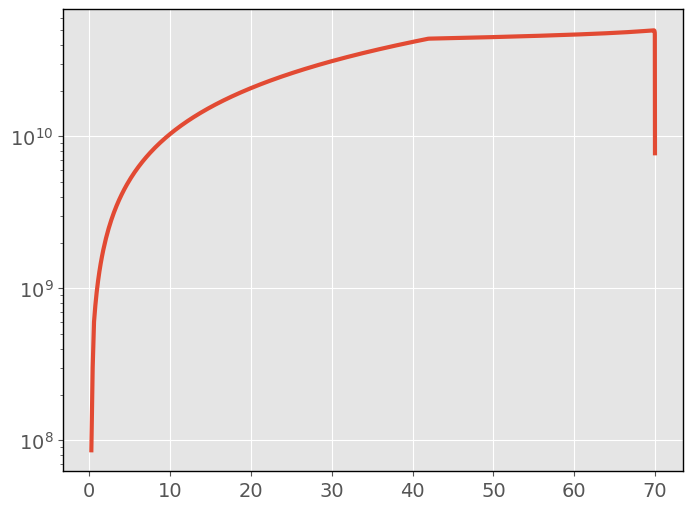

In [30]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]

electron_spitzer_simple = spitzer_electron_simple(sh)

x = sh['y']

fig,ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(x, electron_spitzer_simple, label='Spitzer', linewidth=linewidth)
plt.yscale('log')